<h1 style='color:#e967ea'>Food hub aggregator analysis application</h1>

In [624]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

<hr> <br>

<h2 style='color:#6756ee'>Exploratory data analysis</h2>

In [6]:
food_hub = pd.read_csv('foodhub_order.csv')
food_hub.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [8]:
food_hub.shape

(1898, 9)

In [10]:
food_hub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [23]:
food_hub.describe(include='all')

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


<hr> <br>

<h2 style='color:#6756ee'>Data wrangling</h2>

<p>Checking for and handling null values</p>

In [12]:
food_hub.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

<hr> <br>

<h2 style='color:#6756ee'>Analysis and inferences</h2>

In [34]:
food_hub['food_preparation_time'].min()

20

In [36]:
food_hub['food_preparation_time'].mean()

27.371970495258168

In [38]:
food_hub['food_preparation_time'].max()

35

<h3>Inference</h3>
<p>The minimun value: 20 <br> mean: 27.37 <br> max: 35</p>

In [42]:
food_hub['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [51]:
food_hub['rating'].count() - 736

1162

<h3>Inference</h3>
<p>Number of non-rated orders: 736 <br> Rated: 1162</p>

<hr> <br>

<h2 style='color:#6756ee'>Univariate analysis</h2>

<hr> <br>

<p>Cusine type and day of the week</p>

<h4>Number of orders per restaurant</h4>

In [129]:
food_hub['restaurant_name'].value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

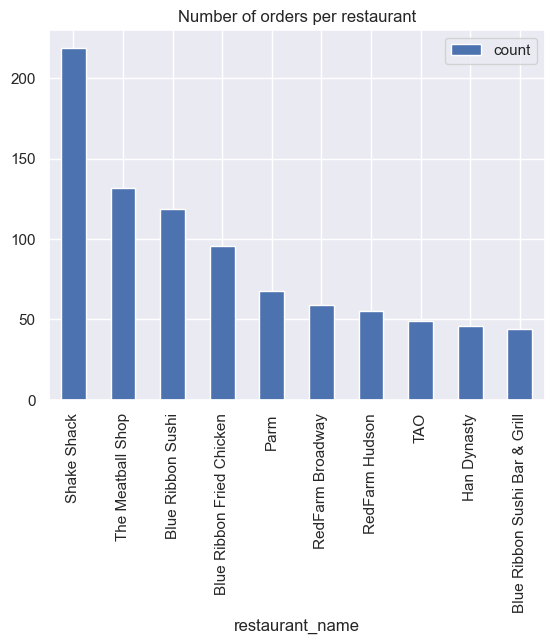

In [639]:
ans = food_hub['restaurant_name'].value_counts().to_frame().head(10)
ans.plot(kind='bar')
plt.title('Number of orders per restaurant')
plt.show()
# sns.countplot(x=ans['restaurant_name'])

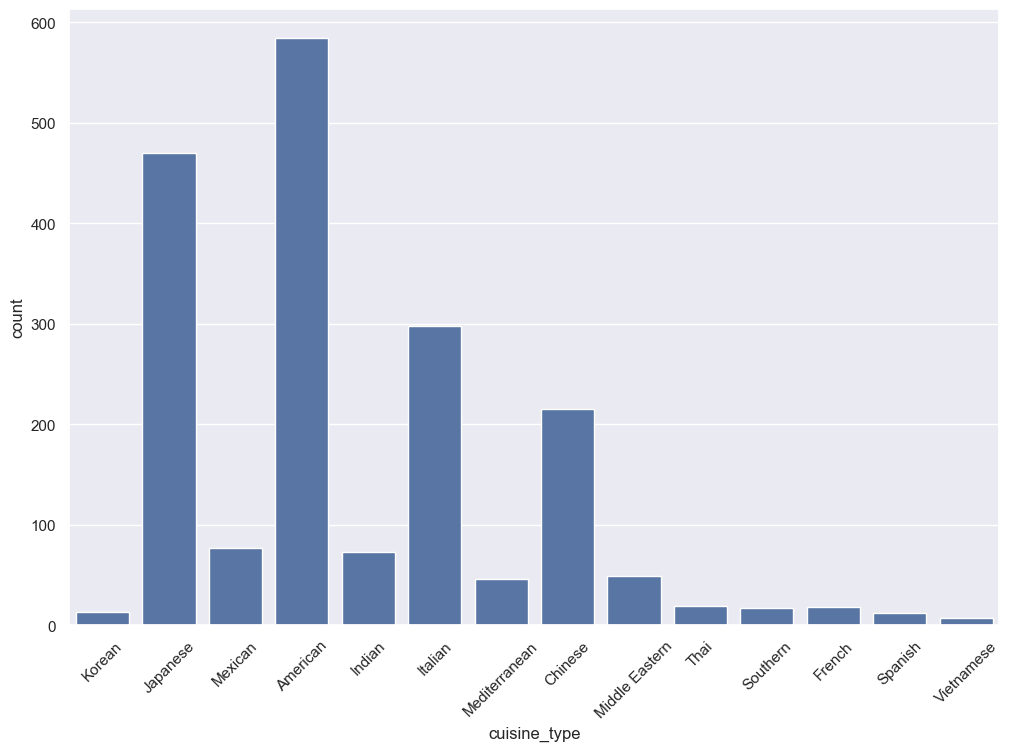

In [171]:
plt.figure(figsize=(12, 8))
sns.countplot(x=food_hub['cuisine_type'])
plt.xticks(rotation=45)
plt.show()

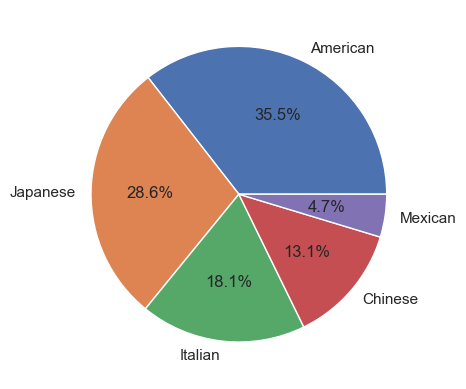

In [203]:
ans = food_hub['cuisine_type'].value_counts()
ans.head(5).plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.show()

<h3>Inferences</h3>
<p>The highest performing restaurant is <strong>Shake shack</strong> closely followed by <strong>The meatball shop</strong> </p>
<p>The highest performing cuisine is <strong>American followed by Japanese</strong>. The least peforming are <strong>Vietnamese and Spanish</strong> in ascending order</p>

<hr> <br>

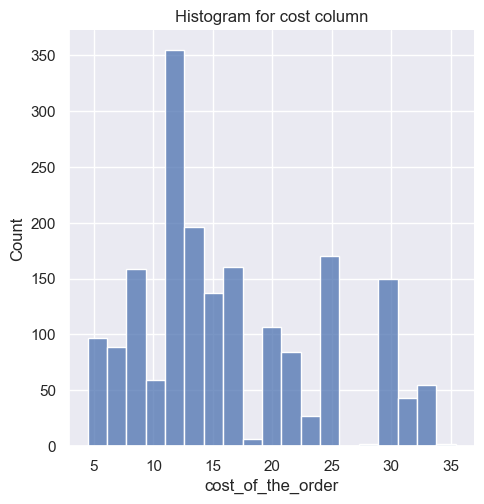

In [211]:
sns.displot(x=food_hub['cost_of_the_order'])
plt.title('Histogram for cost column')
plt.show()

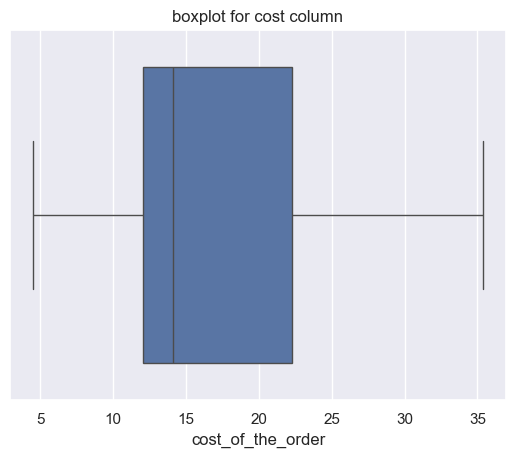

In [213]:
sns.boxplot(x=food_hub['cost_of_the_order'])
plt.title('boxplot for cost column')
plt.show()

<h3>Inferences</h3>
<p>The minimum is about <strong>4.5</strong>, the median is about <strong>14.2</strong> and the max is roughly <strong>35.5</strong> from the boxplot </p>

<hr> <br>

<h3>Number of orders per day of the week</h3>

In [236]:
ans = food_hub['day_of_the_week'].value_counts()

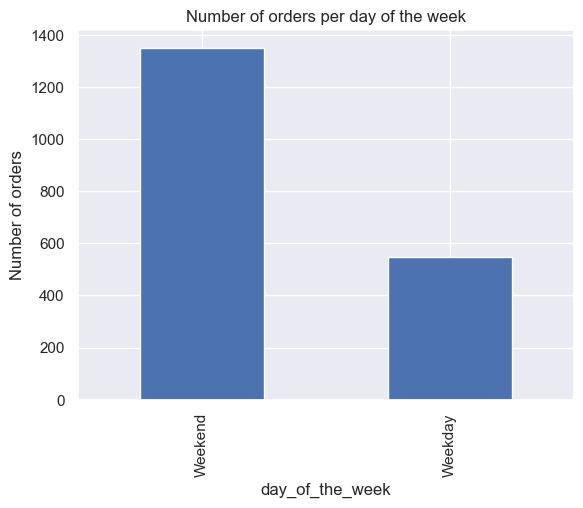

In [244]:
ans.plot(kind='bar')
plt.title('Number of orders per day of the week')
plt.ylabel('Number of orders')
plt.show()

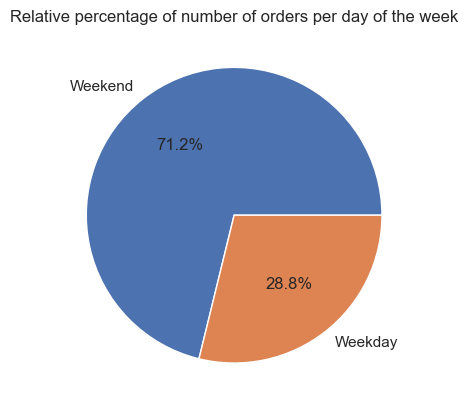

In [248]:
ans.plot(kind='pie', autopct='%1.1f%%')
plt.title('Relative percentage of number of orders per day of the week')
plt.ylabel('')
plt.show()

<h3>Inference</h3>
<p>From the bar plot, weekends have about <strong>1310</strong> orders. This is more than twice that of the weekdays.</p>
<p>The same observation is realized from the pie chart as weekend orders are of a percentage that is just under 3/4s of the entire orders</p>

<hr><br>

<h3>Display the count of ratings and display it using count and pie charts</h3>

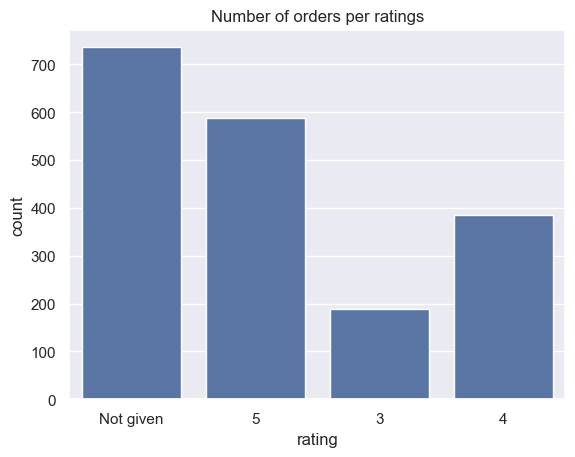

In [265]:
sns.countplot(x=food_hub['rating'])
plt.title('Number of orders per ratings')
plt.show()

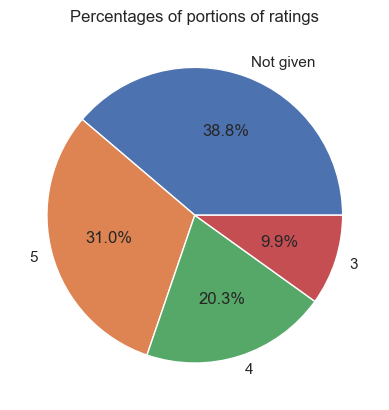

In [273]:
food_hub['rating'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of portions of ratings')
plt.ylabel('')
plt.show()

<h3>Inference</h3>
<p>A huge portion of the orders are not rated; up to 38.8% of the orders are without ratings.</p>
<p>A good percentage (31%) of the orders are higly satisfactory to the customers wheras about 20% of orders fairly satisfactory</p>
<p>10% of orders are of average ratings</p>
<h3>Recommendation</h3>
<p>More needs to be done to compel or sensitize customers to rate their orders more as reasonable enhancements can't be made to the business if stakeholders don't know the satisfaction level of customers</p>

<hr><br>

<h3>Find the min, max and median Food preparation time and also plot them using a distribution plot and box plot</h3>

In [301]:
ans = food_hub['food_preparation_time'].min()
print('min, max, median and mean respectively.')
print(ans)
ans = food_hub['food_preparation_time'].max()
print(ans)
ans = food_hub['food_preparation_time'].quantile(0.5)
print(ans)
ans = food_hub['food_preparation_time'].mean()
print(ans)

min, max, median and mean respectively.
20
35
27.0
27.371970495258168


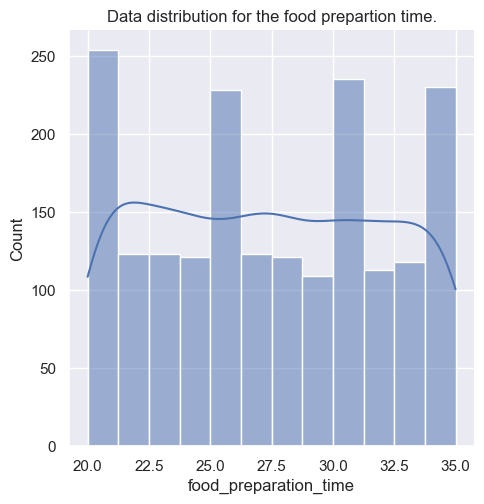

In [288]:
sns.displot(x=food_hub['food_preparation_time'], kde=True)
plt.title('Data distribution for the food prepartion time.')
plt.show()

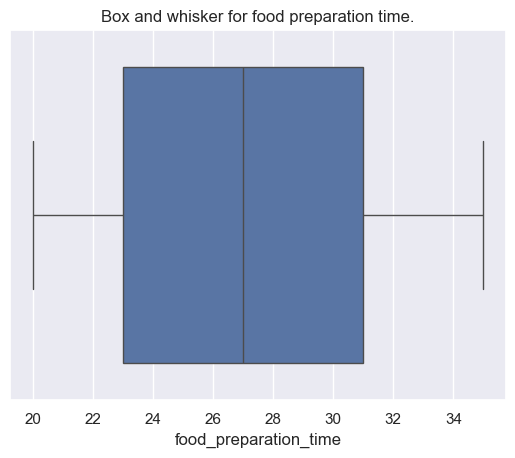

In [286]:
sns.boxplot(x=food_hub['food_preparation_time'])
plt.title('Box and whisker for food preparation time.')
plt.show()

<h3>Inference</h3>
<P>The distribution of the food preparation time is not <strong>normal</strong> but also not <strong>skewed</strong>. Hence there are no <strong> outliers.</strong> This is evident from the box plot. <br> The median is highly similar to the mean  </P>

<hr><br>

In [299]:
ans = food_hub['delivery_time'].min()
print('min, max, median and mean respectively.')
print(ans)
ans = food_hub['delivery_time'].max()
print(ans)
ans = food_hub['delivery_time'].quantile(0.5)
print(ans)
ans = food_hub['delivery_time'].mean()
print(ans)

min, max, median and mean respectively.
15
33
25.0
24.161749209694417


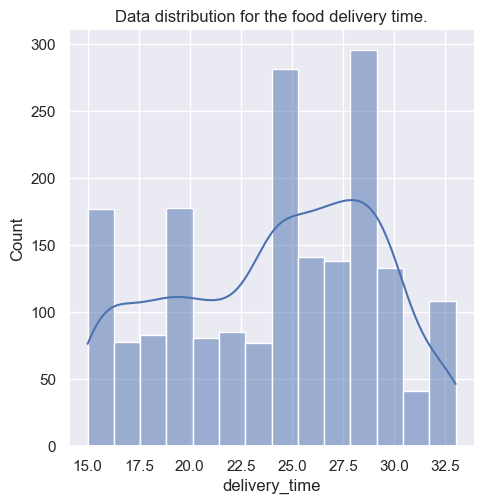

In [295]:
sns.displot(x=food_hub['delivery_time'], kde=True)
plt.title('Data distribution for the food delivery time.')
plt.show()

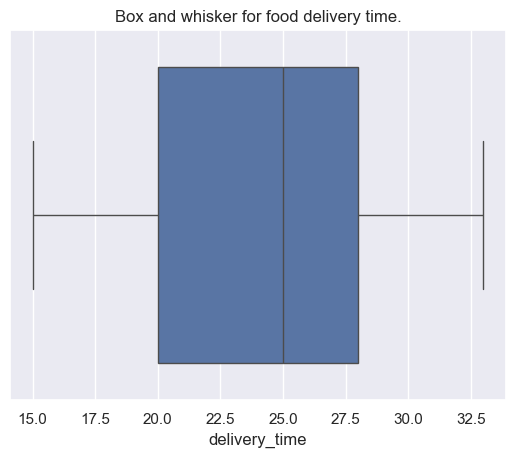

In [297]:
sns.boxplot(x=food_hub['delivery_time'])
plt.title('Box and whisker for food delivery time.')
plt.show()

<h3>Inference</h3>
<P>The distribution of the food delivery time is not <strong>normal</strong> it has a <strong> negative skew</strong>. Albeit there are no <strong> outliers.</strong> This is evident from the box plot. <br> The median is slighly higher than the mean  </P>

<hr><br>

<h3>What are the top 5 restaurants in terms of the number of orders received</h3>

In [310]:
food_hub['restaurant_name'].value_counts().head()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

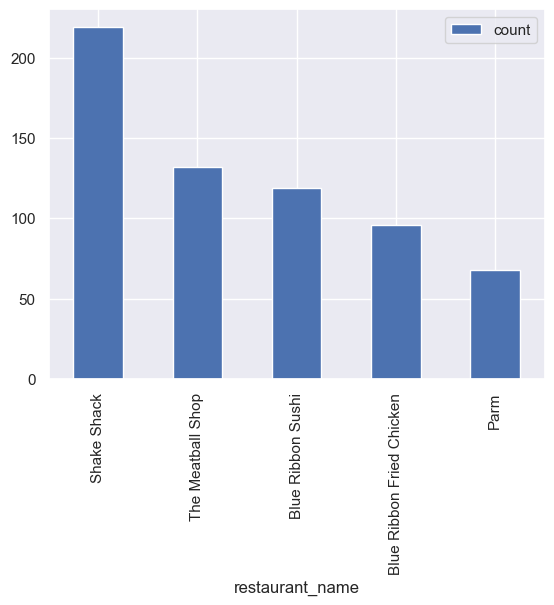

In [316]:
ans = food_hub['restaurant_name'].value_counts().to_frame().head(5)
ans.plot(kind='bar')
plt.show()
# sns.countplot(x=ans['restaurant_name'])

<hr><br>

<h3>Which is the most popular cuisine on weekends?</h3>

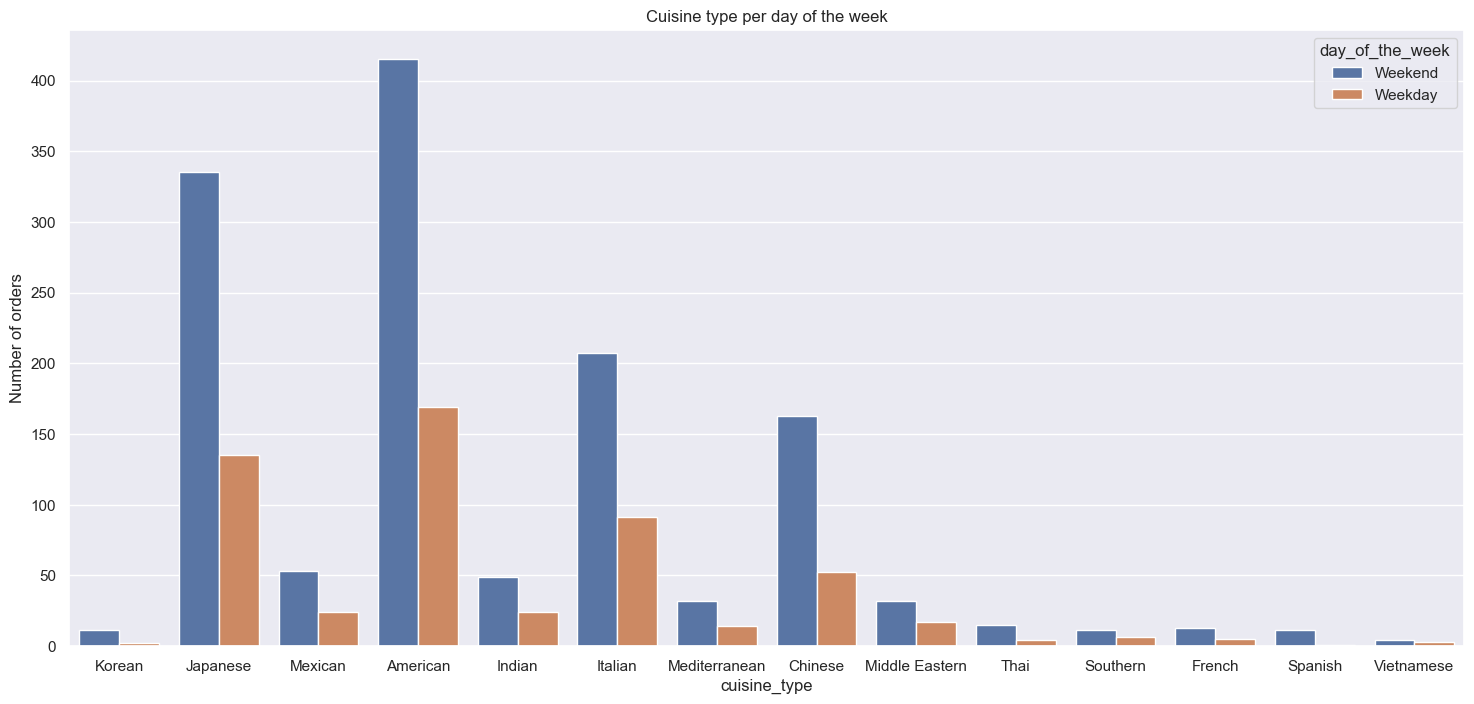

In [401]:
plt.figure(figsize=(18, 8))
sns.countplot(x=food_hub['cuisine_type'], hue=food_hub['day_of_the_week'])
plt.title('Cuisine type per day of the week')
plt.ylabel('Number of orders')
plt.show()

<h3>What percentage of orders cost more than $20</h3>

In [355]:
ans = food_hub['cost_of_the_order'] > 20
ans.sum()

555

In [359]:
ans.sum() / food_hub['cost_of_the_order'].count() * 100

29.24130663856691

<h3>Inferences</h3>
<p>The top 5 restaurants are as seen in the graph before the one above</p>
<p>The most popular cuisine on weekends is American and on weekdays is American too. </p>
<p>29.2% of orders are worth more than $20</p>


<hr><br>

<h3>The company has decided to give 20% discount vouchers to the top 3 most
frequent customers. Find the IDs of these customers and the number of orders
they placed.</h3>

In [461]:
food_hub['customer_id'].value_counts().sort_values(ascending=False).head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

In [475]:
ans = pd.concat([food_hub[food_hub['customer_id'] == 52832], food_hub[food_hub['customer_id'] == 47440], food_hub[food_hub['customer_id'] == 83287]])
ans

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
247,1478179,52832,Han Dynasty,Chinese,12.23,Weekend,3,33,27
272,1477314,52832,ilili Restaurant,Middle Eastern,9.46,Weekday,4,25,25
517,1476916,52832,Dickson's Farmstand Meats,American,15.72,Weekend,4,23,28
526,1478160,52832,Donburi-ya,Japanese,15.86,Weekday,5,28,28
632,1478265,52832,Dos Caminos,Mexican,16.06,Weekend,Not given,35,19
670,1477302,52832,Don's Bogam BBQ & Wine Bar,Korean,12.23,Weekend,Not given,32,20
855,1477041,52832,Junoon,Indian,25.17,Weekday,Not given,23,24
1039,1477013,52832,Donburi-ya,Japanese,8.01,Weekday,5,30,30
1070,1476828,52832,Donburi-ya,Japanese,6.64,Weekday,Not given,21,29
1105,1478245,52832,Junoon,Indian,29.49,Weekend,5,23,17


<h3>Plot the distribution of Cost of Order per Day of the Week (Weekdays and Weekends).</h3>

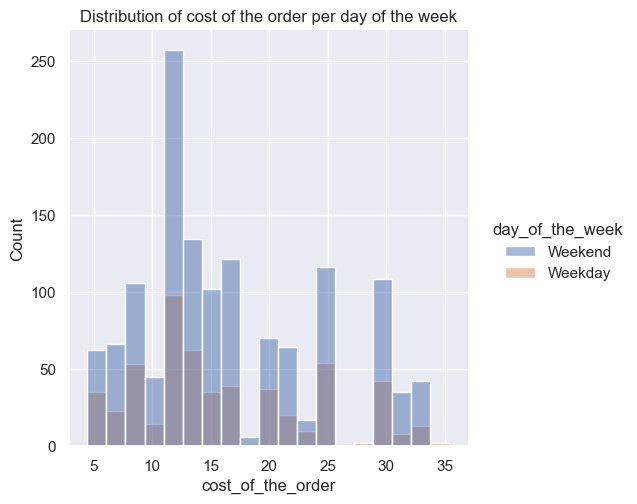

In [407]:
sns.displot(x=food_hub['cost_of_the_order'], hue=food_hub['day_of_the_week'])
plt.title('Distribution of cost of the order per day of the week')
plt.show()

In [399]:
food_hub['food_preparation_time'].value_counts().sort_index()

food_preparation_time
20    119
21    135
22    123
23    123
24    121
25    113
26    115
27    123
28    121
29    109
30    119
31    116
32    113
33    118
34    113
35    117
Name: count, dtype: int64

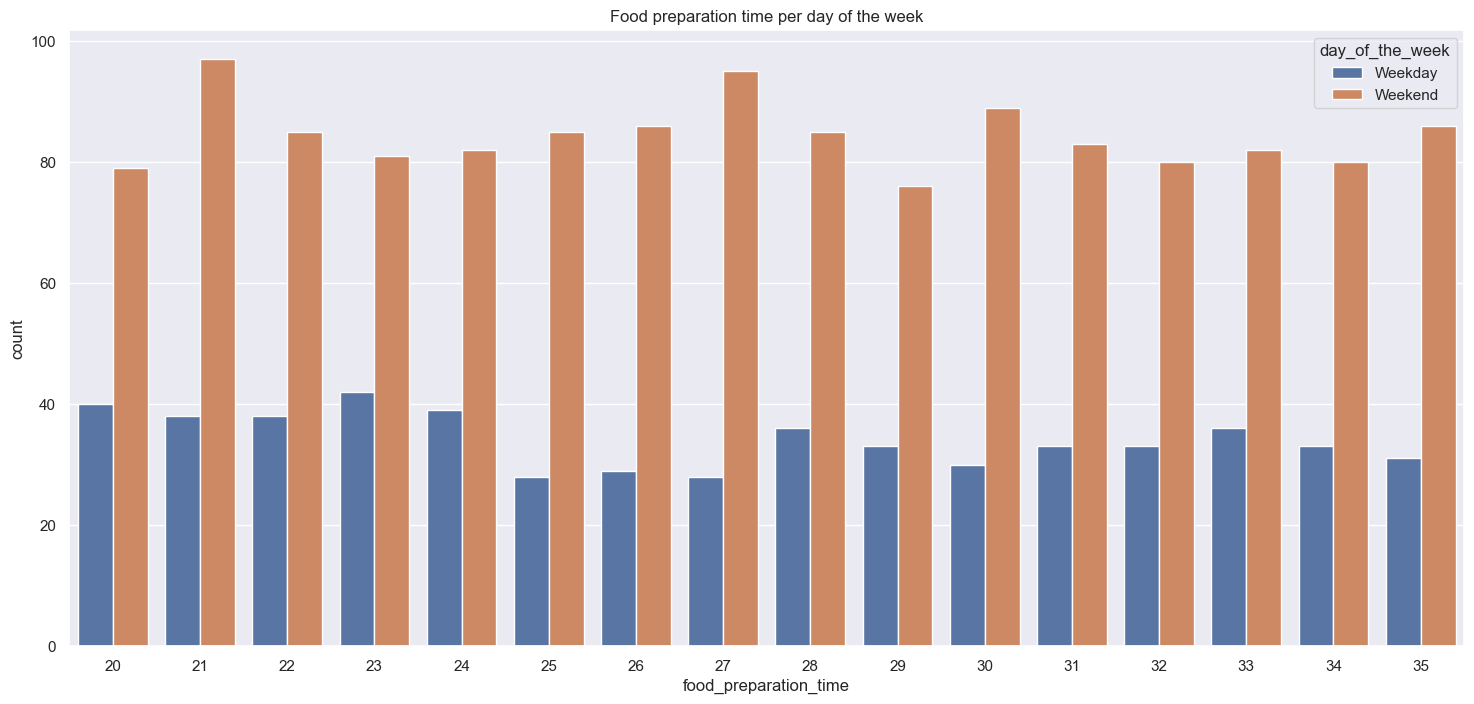

In [385]:
plt.figure(figsize=(18, 8))
sns.countplot(x=food_hub['food_preparation_time'], hue=food_hub['day_of_the_week'])
plt.title('Food preparation time per day of the week')
plt.show()

<h3>Inference</h3>
Food preparation time is always significantly higher during weekend than weekdays

<hr><br>

<h3>Plot the Delivery Time on Weekdays and Weekends and infer your results.</h3>

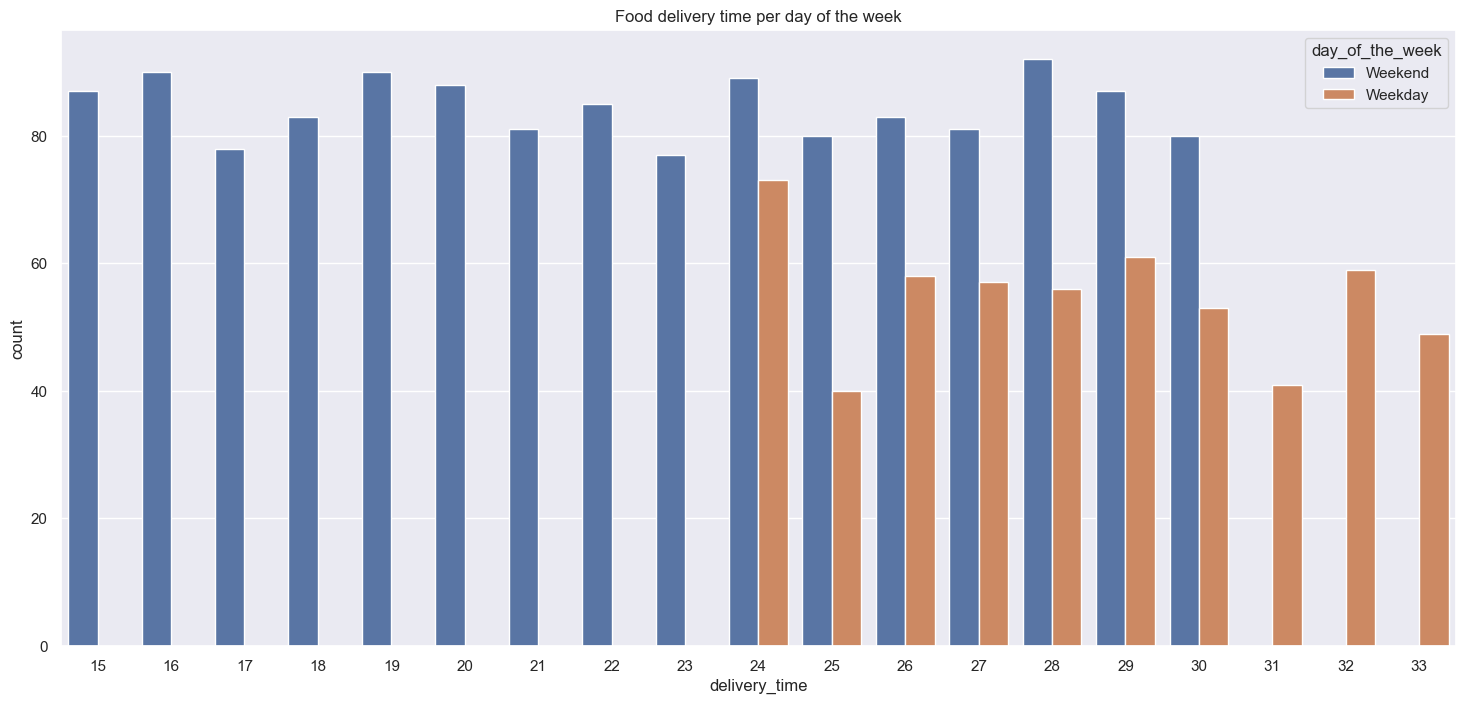

In [414]:
plt.figure(figsize=(18, 8))
sns.countplot(x=food_hub['delivery_time'], hue=food_hub['day_of_the_week'])
plt.title('Food delivery time per day of the week')
plt.show()

<hr><br>

<h3>Plot Cost of the Order per Cuisine type using a box plot and infer your results.</h3>

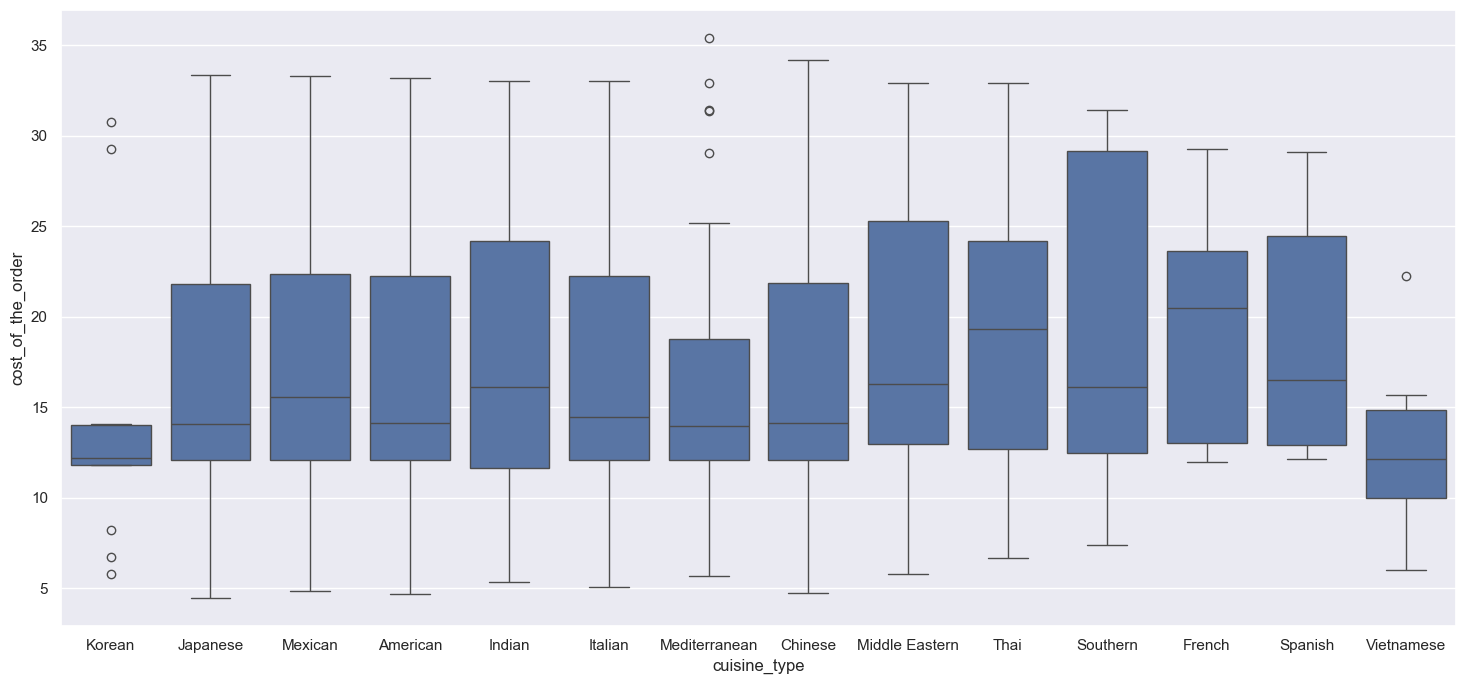

In [422]:
plt.figure(figsize=(18, 8))
sns.boxplot(x=food_hub['cuisine_type'], y=food_hub['cost_of_the_order'])
plt.show()

<h3>Inference</h3>
The Korean cuisine has both high and low outliers,
The Meditarranean cuisine has 4 high outliers
The Vietnamese cuisine has 1 high outlier

<hr><br>

<h3>Plot the relationship between day of the week and delivery time using box plot.</h3>

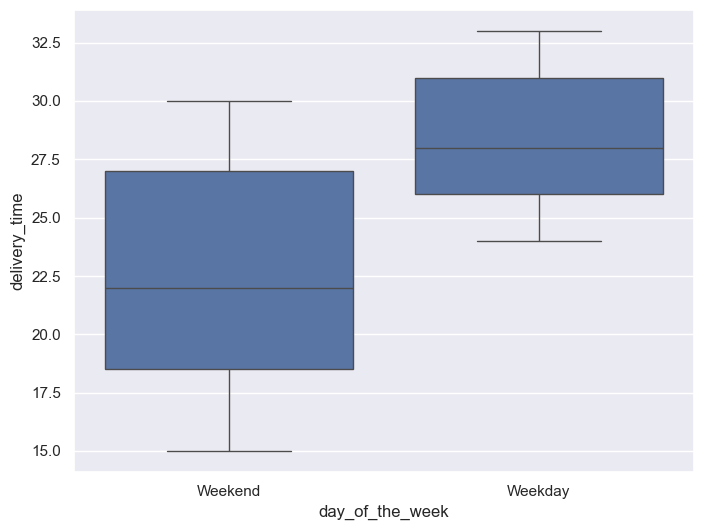

In [440]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=food_hub['day_of_the_week'], y=food_hub['delivery_time'])
plt.show()

<h3>Inference</h3>
Niether Weekends or Weekdays have outliers

<hr><br>

<h3>Find the most expensive and least expensive restaurants.</h3>

In [449]:
ans = food_hub.groupby('restaurant_name')['cost_of_the_order'].mean()
ans.to_frame().sort_values(by=['cost_of_the_order'])

,cost_of_the_order
restaurant_name,
Hunan Manor,5.720
Cipriani Le Specialita,5.920
Big Wong Restaurant _¤¾Ñ¼,5.920
Wa Jeal,6.740
Market Table,6.790
...,...
Il Bambino,29.250
Haru Gramercy Park,29.830
Bhatti Indian Grill,31.115


<h3>Inference</h3>
Least expensive is Hunan Manor <br>
Most expensive Kambi Ramen House

<hr><br>

<h3>The company wants to provide a promotional offer in the advertisement of the
restaurants. The condition to get the offer is that the restaurants must have a
rating count of more than 50 and the average rating should be greater than 4.
Find the restaurants fulfilling the criteria to get the promotional offer. Infer your
results.</h3>

In [626]:
rated_data = food_hub[food_hub['rating'] != 'Not given']
rated_data['rating'] = rated_data['rating'].astype(int)
ans = rated_data.groupby('restaurant_name')['rating'].agg(['mean', 'count'])
ans = ans[ans['mean'] > 4]
ans[ans['count'] > 50]

,mean,count
restaurant_name,,
Blue Ribbon Fried Chicken,4.328125,64
Blue Ribbon Sushi,4.219178,73
Shake Shack,4.278195,133
The Meatball Shop,4.511905,84


<hr> <br>

<h3>The company charges the restaurant 25% on the orders having cost greater than
20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net
revenue generated by the company across all orders. Infer your results.</h3>

In [628]:
food_hub_copy = food_hub
ans = food_hub_copy[food_hub_copy['cost_of_the_order'] > 20]
ans['cost_of_the_order'] = ans['cost_of_the_order'] - (0.25 * ans['cost_of_the_order'])
ans1 = ans['cost_of_the_order'].sum()
ans1

11066.182499999999

In [597]:
food_hub_copy = food_hub
ans = food_hub_copy[food_hub_copy['cost_of_the_order'] <= 20]
ans = ans[ans['cost_of_the_order'] > 5]
ans['cost_of_the_order'] = ans['cost_of_the_order'] - (0.15 * ans['cost_of_the_order'])
ans2 = ans['cost_of_the_order'].sum()
ans2

14039.5945

In [601]:
food_hub_copy = food_hub
ans = food_hub_copy[food_hub_copy['cost_of_the_order'] < 5]
ans3 = ans['cost_of_the_order'].sum()
ans3

42.74

In [603]:
ans1 + ans2 + ans3

28121.929

<h3>Inference</h3>
<p>Total revenue for company after applying all discounts: <strong>28121.929</strong></p>

<hr><br>

<h3>The company wants to analyze the delivery time of the orders on weekdays and
weekends. How does the mean delivery time vary during weekdays and
weekends? Infer your results.</h3>

In [612]:
ans = food_hub.groupby('day_of_the_week')['delivery_time'].mean()
ans

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

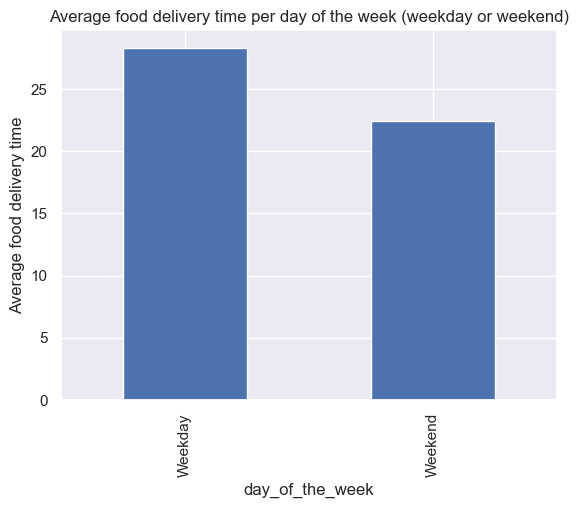

In [621]:
ans.plot(kind='bar')
plt.ylabel('Average food delivery time')
plt.title('Average food delivery time per day of the week (weekday or weekend)')
plt.show()

<h3>Inference</h3>
<p>Weekdays have on average, higher food preparation time than the Weekend</p>

<hr><br>

<h1>Total inference</h1>

The business performs better during the **weekends**, hence adverts need to be done so as to boost **weekday** sales

The ***American and Japanese*** cuisines perform so well. Hence, the ads should be focused more on these cuisines as they will turn up more profit. <br>
The **Vietnamese, southern and Spanish** are the least performing. Hence, no advertisment resources should be wasted on them as they seem irredeemable.